In [1]:
import pandas as pd
import numpy as np
import camelot.io as camelot
import sys

 # adding folders up to system path to access functions
sys.path.insert(0, '../../../')
from driveFolderHandler import downloadTempDriveFolder, deleteTempDriveFolder

In [2]:
path = "../temp-docs"
downloadTempDriveFolder(folderID='1Q2zqLwj91Cod_CvYxg_fKaH_MWuNtXNc',
                        path = path)

Retrieving folder list


Processing file 1ZkUQtSGPGsZAUsnWIsVU2UfWdvXkGNFN 2022 Base and BIL General Supplemental DWSRF IUP.pdf
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1ZkUQtSGPGsZAUsnWIsVU2UfWdvXkGNFN
To: /Users/pcork/epic/dw-dashboard/year1/NC/temp-docs/2022 Base and BIL General Supplemental DWSRF IUP.pdf
100%|██████████| 782k/782k [00:00<00:00, 9.44MB/s]

Files stored in ../temp-docs



Download completed


##  North Carolina

Unlike several of the other state parsing efforts, this process uses the 'lattice' technique in the camelot package, which is based on reading tables based on consistent cell border layouts.

### Appendix B: Intended Use Plan Project Priority List for Base DWSRF and BIL General Supplemental DWSRF

In [2]:
nc_pdfs = camelot.read_pdf(path+"/2022 Base and BIL General Supplemental DWSRF IUP.pdf", 
                           pages='32-56', flavor='lattice', process_background=True,
                           line_scale=40)
print(len(nc_pdfs))

Parsing North Carolina, 33/50...
25


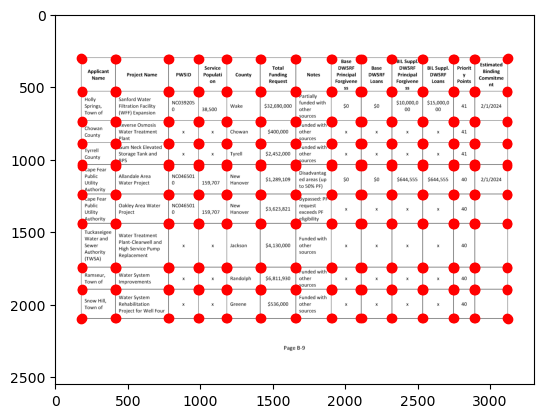

In [3]:
#preview lattice technique's interpretation of the table
camelot.plot(nc_pdfs[8], kind='joint').show()

In [4]:
#list for storing each page
list_of_dfs = []

#loop through each page
for i in range(len(nc_pdfs)):
    
    page_df = nc_pdfs[i].df

    #where first value is empty, remove and start table at second row
    if page_df.iloc[0,0] == '':
        page_df = page_df.iloc[1:,].copy().reset_index(drop=True)

    #throughout the dataframe, remove the linebreak and add a space
    page_df = page_df.replace('\n',' ', regex=True)
    page_df = page_df.replace(r'\s+',' ', regex=True)

    # set column names based on first row
    page_df.columns = page_df.iloc[0,]
    # remove first row
    page_df = page_df.iloc[1:,].copy()

    # drop all columns with redundant names, which in this case are '' because of being empty values in row 1 before assignment
    page_df = page_df.loc[:,~page_df.columns.duplicated()]

    # then, remove the space from the PWSID
    page_df['PWSID'] = page_df['PWSID'].replace(' ', '', regex=True)

    # drop empty rows generated by the space in the pdf
    page_df = page_df.query("County != ''")
    page_df['page'] = i

    list_of_dfs.append(page_df)

#combine all of the dataframes listed to a single and drop index
nc = pd.concat(list_of_dfs).reset_index(drop=True)

#export to csv
nc.to_csv("final_ppls/33-NorthCarolina_PPL_Comprehensive.csv", index=False)

### Fall 2021 Application Round – Funded Projects

In [18]:
nc_pdfs_2 = camelot.read_pdf(path+"/2022 Base and BIL General Supplemental DWSRF IUP.pdf", 
                             pages='57-60', flavor='lattice',
                             line_scale=40)
print(len(nc_pdfs_2))

Parsing North Carolina, 33/50...
6


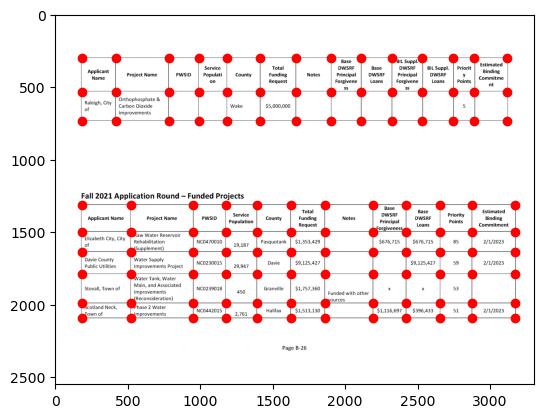

In [36]:
#preview table
camelot.plot(nc_pdfs_2[1], kind='joint').show()

In [39]:
#set column names
nc2_cols = ['Applicant.Name', 'Project.Name', 'PWSID', 'Service.Population', 'County', 'Total.Funding.Request', 'Notes',
            'Base.DWSRF.Principal.Forgiveness','Base.DWSRF.Loans', 'Priority.Points', 'Estimated.Binding.Commitment']

In [40]:
#keep only second table
nc2_1 = nc_pdfs_2[1].df
#drop column row
nc2_1 = nc2_1.iloc[1:,].copy().reset_index(drop=True)
#remove linebreaks and double space characters
nc2_1 = nc2_1.replace("\n", "", regex=True)
nc2_1 = nc2_1.replace(r'\s+',' ', regex=True)
#set columns
nc2_1.columns = nc2_cols
#preview
nc2_1

,Applicant.Name,Project.Name,PWSID,Service.Population,County,Total.Funding.Request,Notes,Base.DWSRF.Principal.Forgiveness,Base.DWSRF.Loans,Priority.Points,Estimated.Binding.Commitment
0,"Elizabeth City, City of",Raw Water Reservoir Rehabilitation (Supplement),NC0470010,"19,187",Pasquotank,"$1,353,429",,"$676,715","$676,715",85,2/1/2023
1,Davie County Public Utilities,Water Supply Improvements Project,NC0230015,"29,947",Davie,"$9,125,427",,,"$9,125,427",59,2/1/2023
2,"Stovall, Town of","Water Tank, Water Main, and Associated Improve...",NC0239018,450,Granville,"$1,757,360",Funded with other sources,x,x,53,
3,"Scotland Neck, Town of",Phase 2 Water Improvements,NC0442015,"2,761",Halifax,"$1,513,130",,"$1,116,697","$396,433",51,2/1/2023


In [42]:
#repeat above process for each page of table
nc2_2 = nc_pdfs_2[2].df
nc2_2 = nc2_2.replace("\n", "", regex=True)
nc2_2.columns = nc2_cols
nc2_2

,Applicant.Name,Project.Name,PWSID,Service.Population,County,Total.Funding.Request,Notes,Base.DWSRF.Principal.Forgiveness,Base.DWSRF.Loans,Priority.Points,Estimated.Binding.Commitment
0,"Enfield, Town of",2021 Water Improvements Project Phase 7 - Dist...,NC0442025,"2,206",Halifax,"$859,685",Bypassed: PF request exceeds PF eligibility,x,x,50,
1,"Pilot Mountain, Town of",Water System Improvements,NC0286025,"1,976",Surry,"$683,000",Funded with other sources,x,x,50,
2,"Sharpsburg, Town of",Phase 3 Water System Improvements Project,NC0464040,"2,006",Edgecombe / Nash / Wilson,"$928,000",Bypassed: PF request exceeds PF eligibility,x,x,48,
3,"Sanford, City of",Sanford WTP Expansion,NC0353010,"47,302",Lee,"$73,770,000",,"$500,000","$19,500,000",48,2/1/2023
4,"Peachland, Town of",Phase 1 Water Improvements,NC0304034,423,Anson,"$1,719,105",Bypassed: PF request exceeds PF eligibility,x,x,46,
5,"Fuquay-Varina, Town of",Sanford WTP Expansion,NC0392055,"30,424",Wake,"$73,770,000",,,"$15,000,000",45,2/1/2023
6,"Yanceyville, Town of",Waterline Replacement,NC0217010,"1,937",Caswell,"$1,325,000",Bypassed: PF request exceeds PF eligibility,x,x,40,
7,"Siler City, Town of",Water Pressure Project in Homewood Acres Neigh...,NC0319010,"8,469",Chatham,"$826,355",,"$206,589","$619,766",40,2/1/2023
8,"Winston-Salem, City of",Neilson WTP Modernization,NC0234010,"374,403",Forsyth,"$41,870,000",Bypassed to meet 15% small systems target,x,x,39,
9,"Lucama, Town of",2021 Water Line Replacement and Elevated Stora...,NC0498030,881,Wilson,"$1,405,000",,"$500,000","$905,000",38,2/1/2023


In [48]:
#repeat above process for each page of table
nc2_3 = nc_pdfs_2[3].df
nc2_3 = nc2_3.replace("\n", "", regex=True)
# manually fix one missing Project.Name
nc2_3.iloc[14,1] = "Tallulah Creek Water Treatment Plant Upgrades (Reconsideration)"
nc2_3.columns = nc2_cols
nc2_3

,Applicant.Name,Project.Name,PWSID,Service.Population,County,Total.Funding.Request,Notes,Base.DWSRF.Principal.Forgiveness,Base.DWSRF.Loans,Priority.Points,Estimated.Binding.Commitment
0,"Burgaw, Town of",Water Distribution System Rehabilitation Project,NC0471010,"4,250",Pender,"$3,271,044",Bypassed: PF request exceeds PF eligibility,x,x,36,
1,Town of Franklin,Phase II WTP Improvements,NC0157010,"9,650",Macon,"$8,889,000",Project funded previously,x,x,36,
2,Craven County,Craven County Water Telemetry / SCADA (Reconsi...,NC0425055,"32,500",Craven,"$5,499,221",Bypassed to meet 15% small systems target,x,x,35,
3,Junaluska Sanitary District,Oak Park Water Line Replacement,NC0144035,"4,613",Haywood,"$3,961,316",,,"$3,961,316",35,2/1/2023
4,Franklin County,New Mays Crossroads Elevated Tank,,,Franklin,"$4,081,000",,,,35,
5,Fayetteville Public Works Commission,PO Hoffer WTF Phase 3 Residuals,,,Cumberland,"$20,784,031",,,,32,
6,"Henderson, City of",Kerr Lake Regional Water Treatment Plant Upgrades,,,Vance,"$20,837,941",,,,32,
7,"Dunn, City of",Highway 301 South Elevated Tank (Reconsideration),,,Harnett,"$2,950,000",,,,31,
8,Cape Fear Public Utility Authority,"Replacement of Water Mains, Valves and Water S...",,,New Hanover,"$1,758,300",,,,30,
9,"Elkin, Town of",West Zone Improvements (Reconsideration),,,Surry / Wilkes,"$4,079,874",,,,30,


In [49]:
#repeat above process for each page of table
nc2_4 = nc_pdfs_2[4].df
nc2_4 = nc2_4.iloc[1:,].copy().reset_index(drop=True)
nc2_4 = nc2_4.replace("\n", "", regex=True)
nc2_4.columns = nc2_cols
nc2_4

,Applicant.Name,Project.Name,PWSID,Service.Population,County,Total.Funding.Request,Notes,Base.DWSRF.Principal.Forgiveness,Base.DWSRF.Loans,Priority.Points,Estimated.Binding.Commitment
0,Stokes Water & Sewer Authority,Hinsdale Road Water Main Extension Project (Re...,,,Stokes,"$1,130,300",,,,26,
1,Sampson County,Keener Groundwater Supply Well,,,Sampson,"$1,503,825",,,,25,
2,"Graham, City of","10"" Water Main Replacement from Treatment Plan...",,,Alamance,"$10,092,000",,,,23,
3,Sampson County,Governor Moore Road and South McCullen Road Wa...,,,Sampson,"$1,671,750",,,,22,
4,Sampson County,Town of Harrells Interconnection,,,Sampson,"$2,762,800",,,,22,
5,"Mocksville, Town of",Madison Road BPS Renovation and North Elevated...,,,Davie,"$3,451,200",,,,19,


In [54]:
# Collect pages of NC Table 2
nc_2 = pd.concat([nc2_1, nc2_2, nc2_3, nc2_4])
nc_2 = nc_2.reset_index(drop=True)
nc_2.to_csv("33-NorthCarolina_Fall21_ApplicationRound_FundedProjects.csv", index=False)

In [3]:
deleteTempDriveFolder(path)

Deleted folder and all files within ../temp-docs
